# Bike sharing data

In [91]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [92]:
# loading the dataset
bike_daily = pd.read_csv("bike_sharing_daily.csv")
bike_daily['dteday'] = pd.to_datetime(bike_daily['dteday'])
display(bike_daily)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Data characteristics:

Data contains 731 observations spreading over 16 columns:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week (0-Sunday, 1-Monday, ..., 6-Saturday)
- workingday : if day is neither weekend nor holiday is 0, otherwise is 1.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

No missing values are reported in the dataset. The descriptive statistical for numerical variables have been displayed below.

In [93]:
bike_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Visualisation of rentals trends overtime

I visualized the rental trends over time by plotting the number of rentals and incorporating a 7-day moving average to reveal underlying patterns. Furthermore, I segmented the visualization to separately display the rental trends for casual and registered users, emphasizing the distinctions between their patterns.

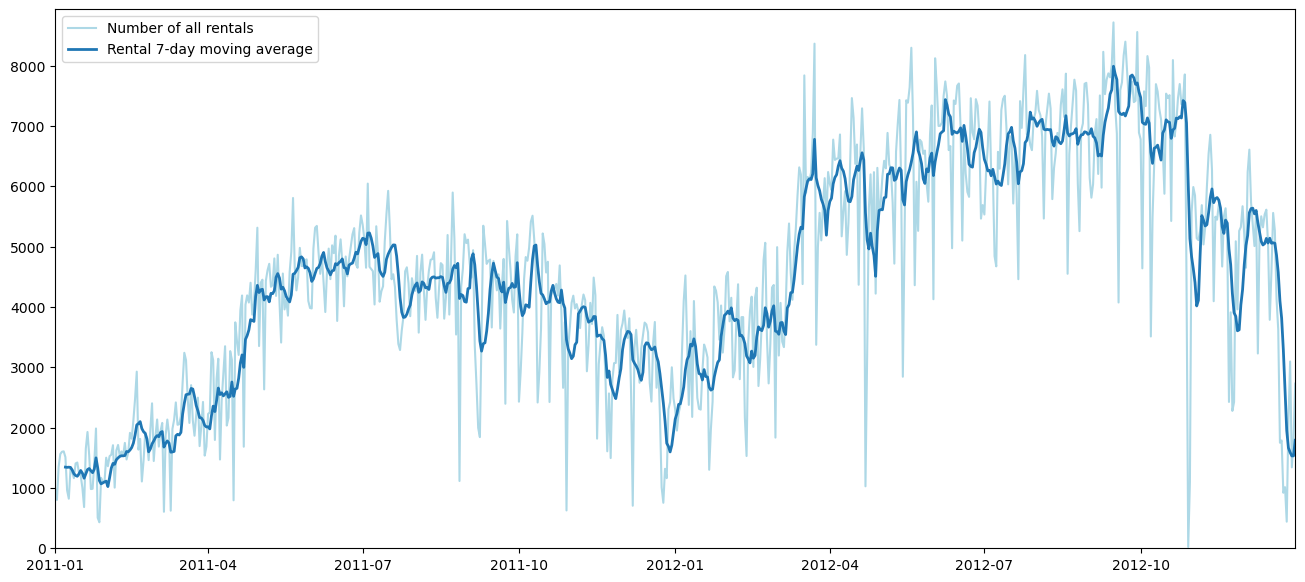

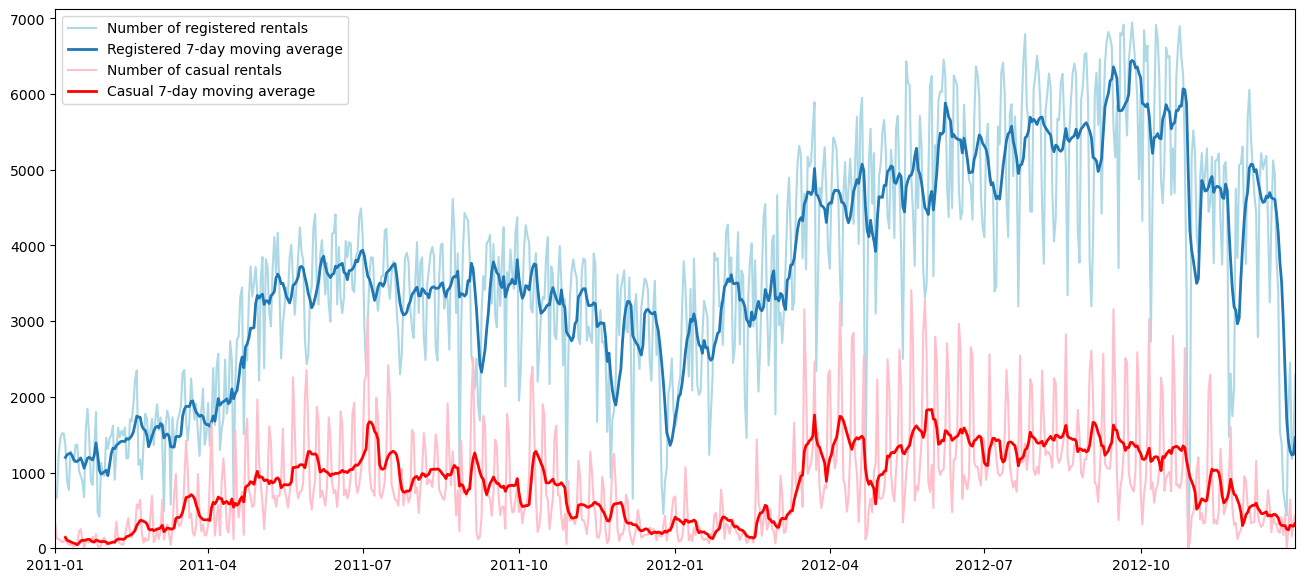

In [94]:
# Visualisation of the data
plt.figure(figsize=(16, 7))
plt.plot(bike_daily['dteday'], bike_daily['cnt'], label='Number of all rentals', color='lightblue')
plt.plot(bike_daily['dteday'], bike_daily['cnt'].rolling(7).mean(), linewidth=2.0, label='Rental 7-day moving average')
plt.xlim([bike_daily['dteday'].min(), bike_daily['dteday'].max()])
plt.ylim([0, bike_daily['cnt'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

# Visualisation depending on the casual or registered member
plt.figure(figsize=(16, 7))
plt.plot(bike_daily['dteday'], bike_daily['registered'], label='Number of registered rentals', color='lightblue')
plt.plot(bike_daily['dteday'], bike_daily['registered'].rolling(7).mean(), linewidth=2.0, label='Registered 7-day moving average')
plt.plot(bike_daily['dteday'], bike_daily['casual'], label='Number of casual rentals', color='pink')
plt.plot(bike_daily['dteday'], bike_daily['casual'].rolling(7).mean(), linewidth=2.0, label='Casual 7-day moving average', color='red')
plt.xlim([bike_daily['dteday'].min(), bike_daily['dteday'].max()])
plt.ylim([0, bike_daily['registered'].max()*1.025])
plt.legend(loc='upper left')
plt.show()


The overtime visualization facilitates the examination of general trends and changes over months of the year and seasons. Potential observations can be further explored, such as the significant influence of seasons on the number of bikes rented, and the notable overall increase in rentals in 2012 compared to 2011. Upon analyzing the data for casual and registered renters, we observe significantly more rented bikes for registered members. Additionally, the 7-day moving averages exhibit different trends, suggesting that specific weekly patterns may vary between these two groups of users.

## Assigment of variables

Independent Features Matrix (X):

- season (categorical)
- yr (categorical)
- mnth (categorical)
- holiday (categorical)
- weekday (categorical)
- workingday (categorical)
- weathersit (categorical)
- temp (continues)
- atemp (continues)
- hum (continues)
- windspeed (continues)

The instant and dteday will be removed from further analysis.

Dependent Target Vector (y):

- casual (continues)
- registered (continues)
- cnt (continues)

In [95]:
bike_daily.drop(['instant', 'dteday'], axis=1, inplace=True)
bike_daily.sample(5)

# assigment of features variable and the target
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','yr', 'mnth','holiday','weekday','workingday','weathersit']
target_3 = ['cnt', 'casual', 'registered']
target = 'cnt'

# assign season, months and weekdays names instead of numbers
bike_daily['season'] = bike_daily['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
bike_daily['mnth'] = bike_daily['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bike_daily['weekday'] = bike_daily['weekday'].map({0:'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


## Exploratory Data Analysis (EDA)

Aiming to characterize the feature variables individually, collectively, and in comparison to the target variable.

### Univariate Analysis


#### Numeric features

In the dataset 4 variable are continues temp, atemp, hum and windspeed, all been normalised. The descriptive statistic have been calculated and histograms plotted below


,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


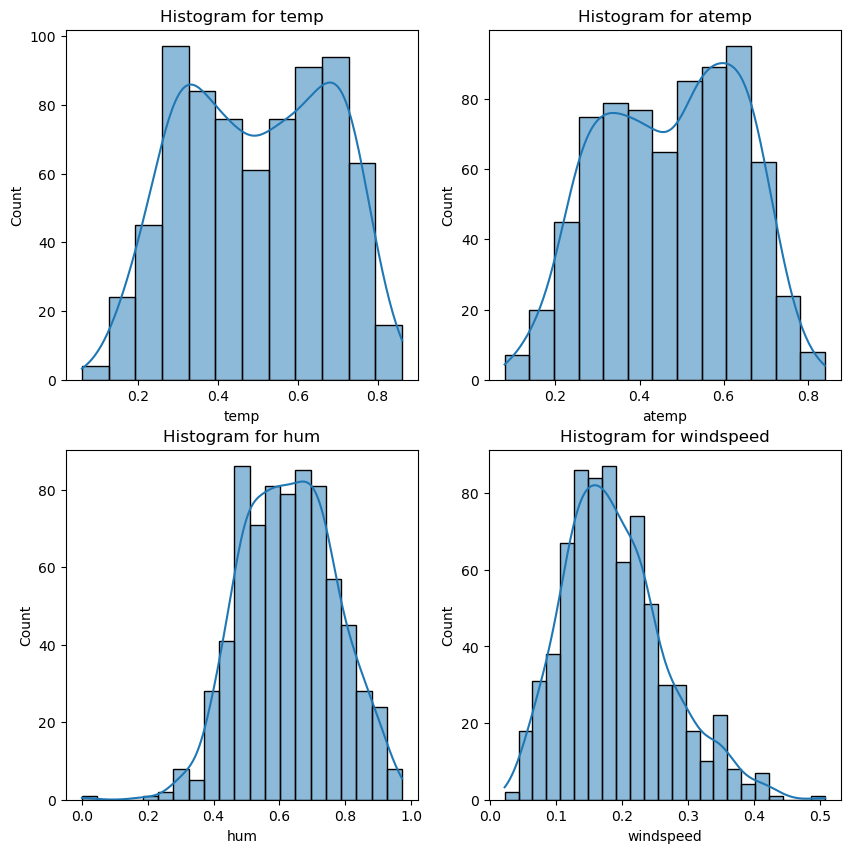

In [96]:
display(bike_daily[numeric_features].describe())

fig, axs = plt.subplots(2,2, figsize=(10, 10))
for f, ax in zip(numeric_features, axs.flat):
    sns.histplot(data=bike_daily, x=f, ax=ax, kde=True)
    ax.set_title(f"Histogram for {f}")
plt.show()

#### Categorical features

The categorical features consist of 7 variables describing calendar and weather data. Countplots were used to visualize the categorical columns. The season, year, month, and weekday represent the count of days spread over a two-year period (2011 and 2012). No abnormalities were observed among any of these time measurements, and no values are missing. As expected, there is a higher number of working days, and the count visualizations reflect this trend. The 'weathersit' variable contains only three weather groups, with significantly greater counts for groups 1 and 2 compared to the third group.

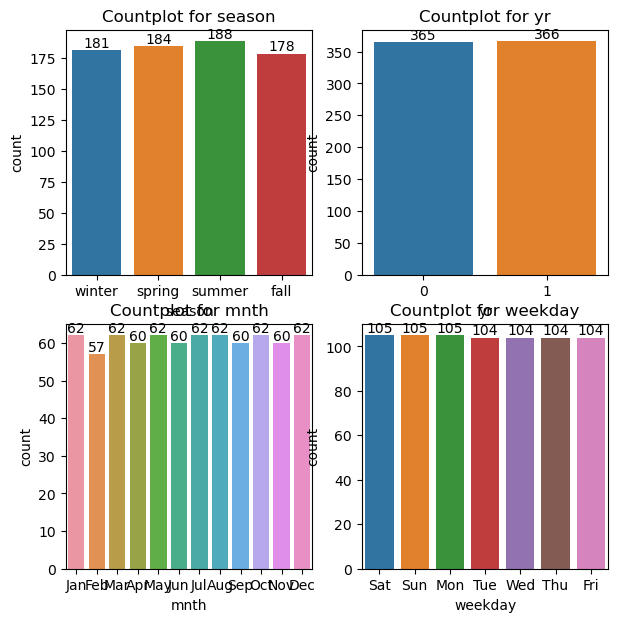

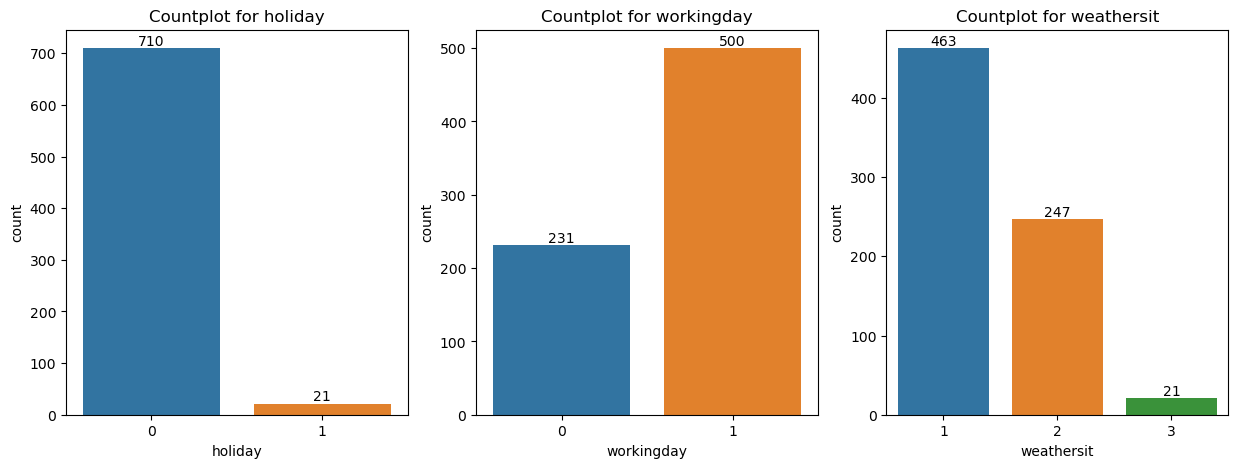

In [97]:
# countplot for the categorical columns
fig, axs = plt.subplots(2,2, figsize=(7, 7))
for f, ax in zip((categorical_features[ind] for ind in [0,1,2,4]), axs.flat):
    sns.countplot(data=bike_daily, x=f, ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"Countplot for {f}")
plt.show()

fig, axs = plt.subplots(1,3, figsize=(15, 5))
for f, ax in zip((categorical_features[ind] for ind in [3,5,6]), axs.flat):
    sns.countplot(data=bike_daily, x=f, ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"Countplot for {f}")
plt.show()


### Bivariate Analysis

#### Numerical features

The correlation examines the linear relation of two variables and drawn conclusion regarding appropiete machine learning model to use. 

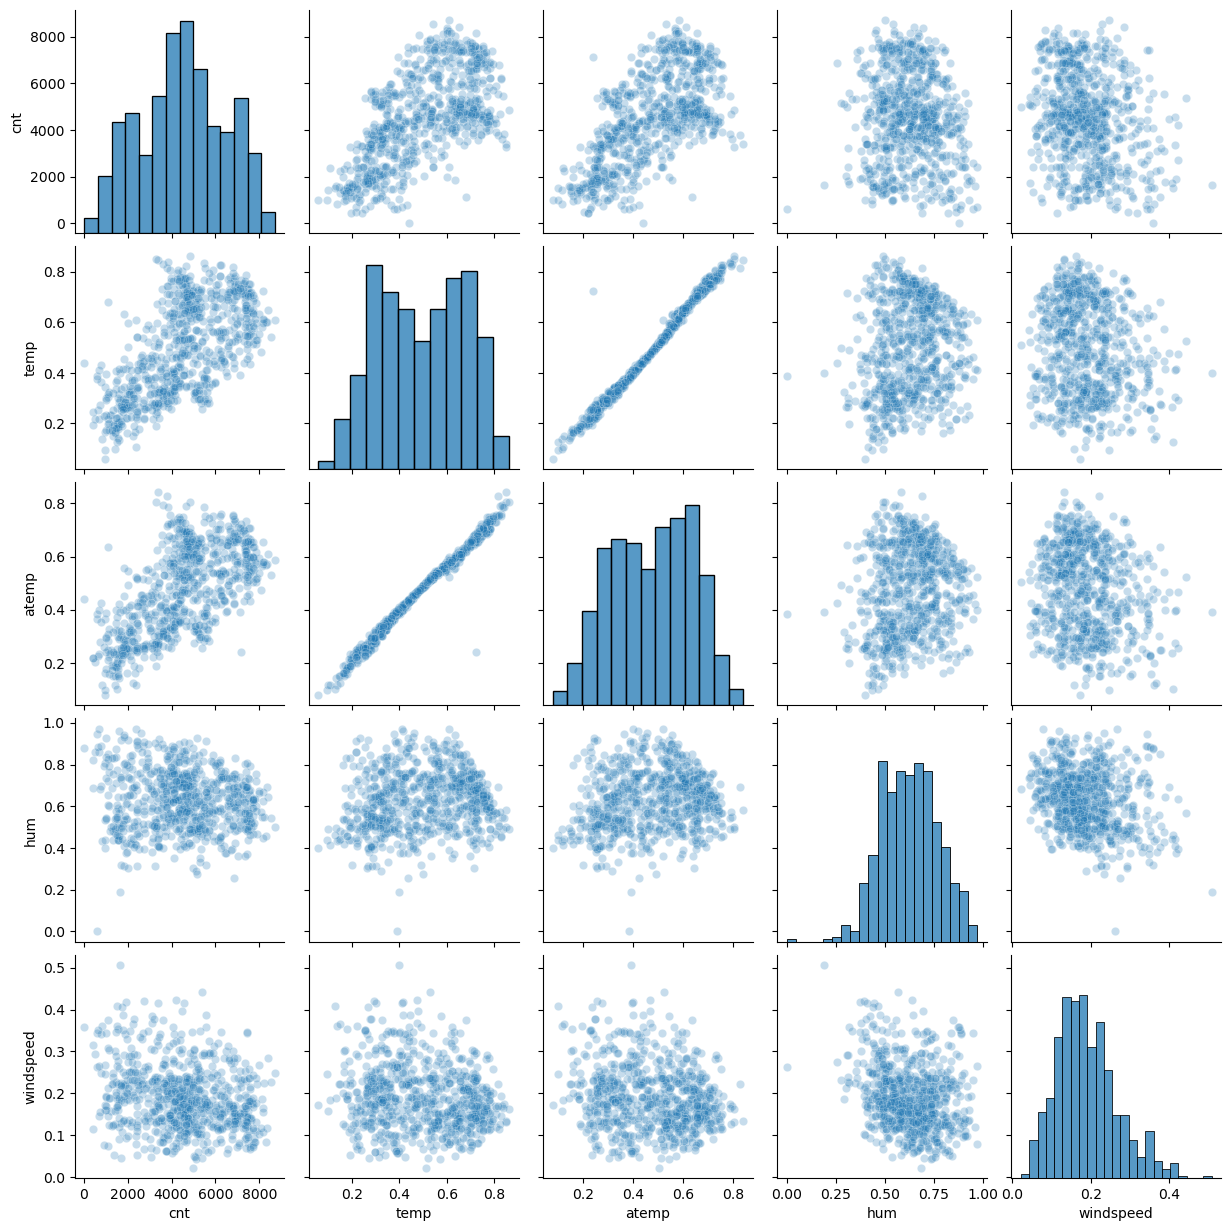

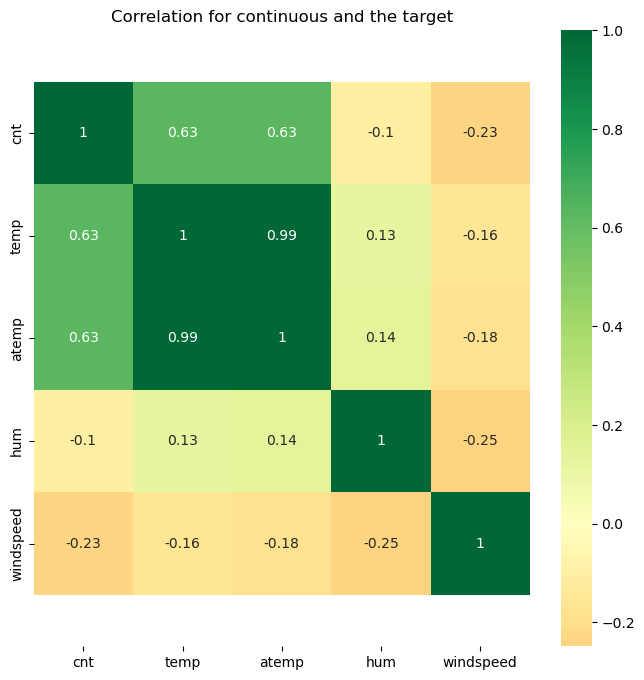

In [98]:
# Scatterplots for numerical variables
fig = sns.pairplot(bike_daily[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_daily[[target]+numeric_features].corr(),
                 xticklabels=bike_daily[[target]+numeric_features].corr().columns,
                 yticklabels=bike_daily[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Correlation for continuous and the target', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The heatmap correlation indicates that sharing exhibit a positive correlation with both temperature (temp) and 'feels like' temperature (atemp). However, these two temperature measures are closely correlated with each other. Conversely, humidity and wind speed show a small negative relationship with the target variable.

As 'temp' and 'atemp' contain redundant information presenting multicollinearity. Their combination will be presented to enhance their impact on the target values. Below, the new correlation for temperature and the temperature difference (difference_temp) has been calculated.

In [99]:
bike_daily['difference_temp'] = (bike_daily['atemp'] - bike_daily['temp'])/bike_daily['temp']
bike_daily.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_daily[['cnt', 'temp', 'difference_temp']].corr()

,cnt,temp,difference_temp
cnt,1.000000,0.627494,-0.349898
temp,0.627494,1.000000,-0.599254
difference_temp,-0.349898,-0.599254,1.000000


The new correlation coefficients have been displayed for the 'temp,' 'difference,' and 'cnt' variables. The new column is still temperature-related; however, the coefficient is significantly lower, and a negative correlation is observed with the sharing values.

#### Categorical variables

##### Season

        count         mean          std     min     25%     50%      75%  \
season                                                                     
fall    178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   
spring  184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
summer  188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
winter  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   

           max  
season          
fall    8555.0  
spring  8362.0  
summer  8714.0  
winter  7836.0  


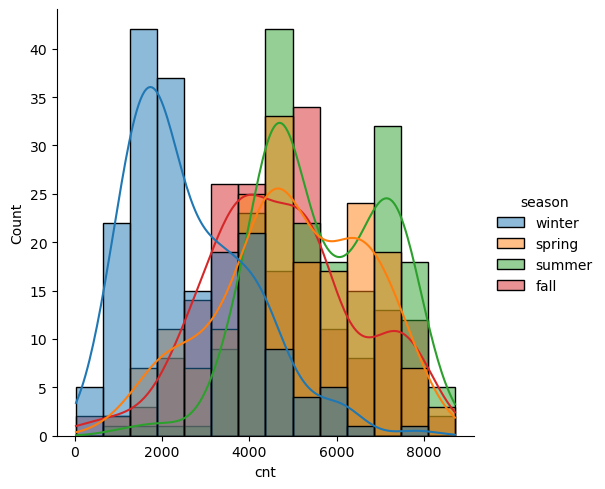

In [100]:
# Histogram for season data
print(bike_daily.groupby('season')[target].describe())
sns.displot(data=bike_daily,  x=target, hue='season', kde=True)

The first histograms illustrates the seasons, each displaying distinct distributions of bike sharing. During winter, there is a lower demand for bikes, with a median of 2209 and a mean of approximately 2600, confirming the general expected trend of rarer bike usage during those months. In spring, the distribution shifts towards higher rental values, with a median of 4942 and a mean of 4992. As expected, summer shows the highest mean (5644) and median (5353) values, clearly aligning with anticipated trends. Finally, autumn exhibits a distribution with a median of 4634, notably lower rentals compared to summer. All season distributions are right-skewed, likely due to sunny days or weekends when more people potentially shares bikes.

##### Month

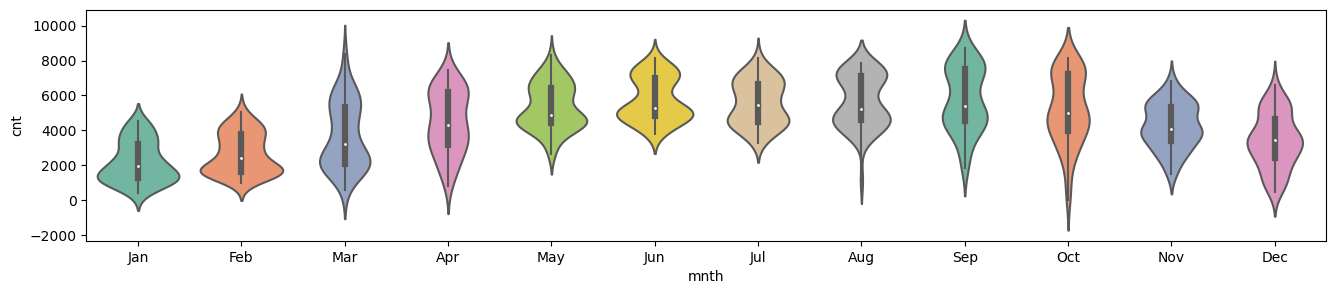

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
Apr,60.0,4484.900000,1776.160778,795.0,3188.25,4293.5,6205.25,7460.0
Aug,62.0,5664.419355,1494.516146,1115.0,4582.50,5229.5,7121.00,7865.0
Dec,62.0,3403.806452,1549.639353,441.0,2425.00,3444.0,4633.00,6606.0
Feb,57.0,2655.298246,1145.313307,1005.0,1623.00,2402.0,3777.00,5062.0
Jan,62.0,2176.338710,1161.674370,431.0,1251.75,1939.0,3235.75,4521.0
Jul,62.0,5563.677419,1273.751871,3285.0,4491.50,5446.5,6678.75,8173.0
Jun,60.0,5772.366667,1240.400031,3767.0,4834.50,5308.5,6983.00,8120.0
Mar,62.0,3692.258065,1899.301812,605.0,2077.00,3216.5,5361.00,8362.0
May,62.0,5349.774194,1298.711561,2633.0,4409.00,4890.5,6405.50,8294.0


In [101]:
plt.figure(figsize=(16, 3))
sns.violinplot(y=bike_daily[target], x=bike_daily['mnth'], palette="Set2")
plt.show()

bike_daily.groupby('mnth')['cnt'].describe()

The distributions of bike rentals clearly coincide with the seasons. The months with the lowest bike rentals are the winter months (December, January, and February). Starting from March, we observe distributions shifting towards higher values, with the highest median reported for July. From this point onwards, the distributions trend towards lower numbers of bike rentals, with the smallest values observed in January.

##### Holidays, weekdays


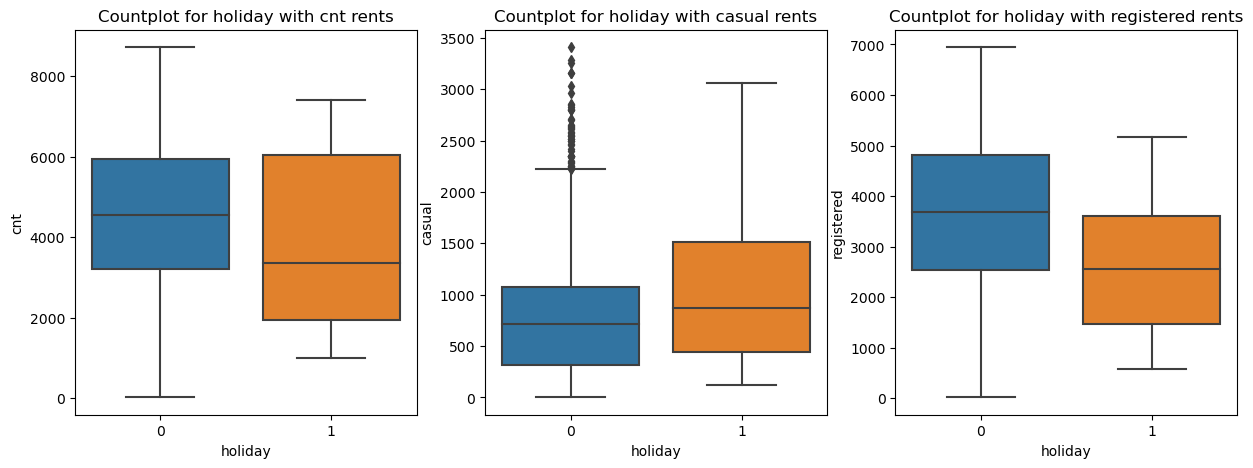

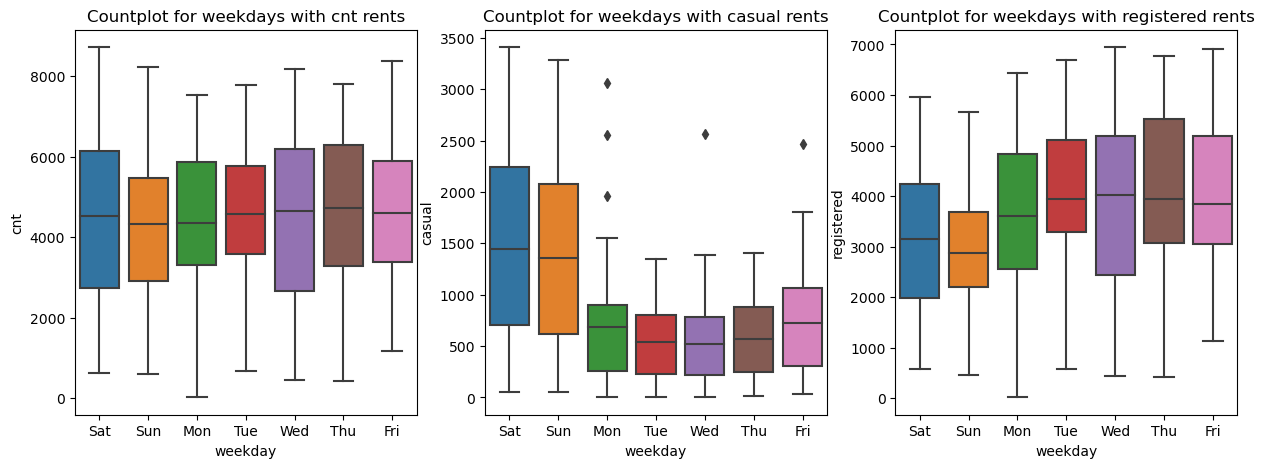

In [102]:
# Boxplot for holidays and weekdays
fig, axs = plt.subplots(1,3, figsize=(15, 5))
for t, ax in zip(target_3, axs.flat):
    ax = sns.boxplot(data=bike_daily, x='holiday', y=t, ax=ax)
    ax.set_title(f"Countplot for holiday with {t} rents")
plt.show()

fig, axs = plt.subplots(1,3, figsize=(15, 5))
for t, ax in zip(target_3, axs.flat):
    ax = sns.boxplot(data=bike_daily, x='weekday', y=t, ax=ax)
    ax.set_title(f"Countplot for weekdays with {t} rents")
plt.show()


The following boxplots illustrate the relationship between bike sharing and specific days. From the visualization, holidays exhibit less spread in distributions, with median numbers of bikes rented lower compared to regular days. Conversely, the day of the week does not seem to have a significant impact on the number of bike shares. However, from the original data, two variables represented the total number of bike rentals: casual and registered members. Interestingly, different trends for casual and registered users can be observed. Casual bikers tend to use bikes mostly during the weekend (0: Sunday, 6: Saturday), with an overall lower number of bikes rented on workdays for this group. Conversely, registered members tend to share bikes more on weekdays and working days, potentially using them as a means of transport.

##### Weather category


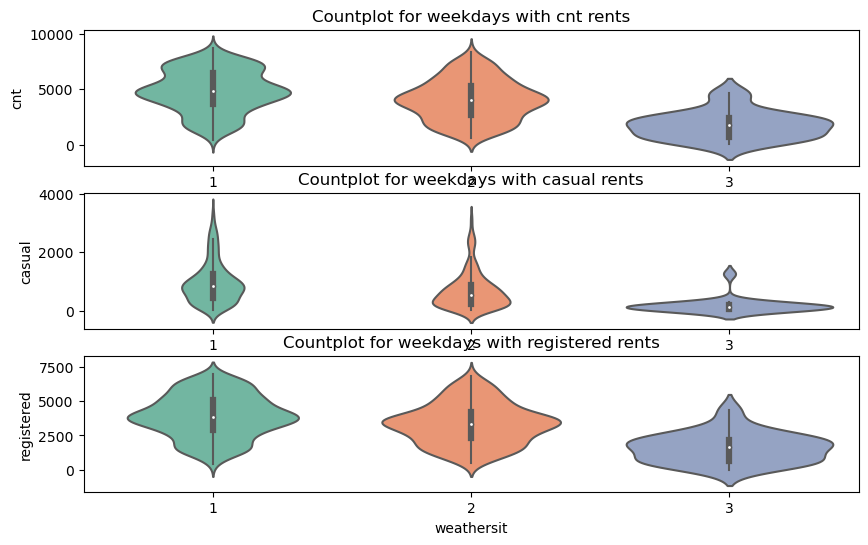

In [103]:
fig, axs = plt.subplots(3,1, figsize=(10, 6))
for t, ax in zip(target_3, axs.flat):
    ax = sns.violinplot(data=bike_daily, x='weathersit', y=t, ax=ax, palette="Set2")
    ax.set_title(f"Countplot for weekdays with {t} rents")
plt.show()


The final plots examining categorical bivariate data consist of violin plots of 'weathersit,' depicting weather conditions in categorical features. The first and second groups correspond to sunnier weather, while the third and fourth represent rainy or snowy days. The distributions of groups 1 and 2 confirm the expected trend of higher bike rentals, whereas group 3 exhibits a distribution concentrated around lower values.

### Multivariate Analysis

Combining numerical and categorical variables with the target.

#### Numerical variables vs year

In the initial visualizations, there was a clear increase in the number of shared bikes between the two studied years. To examine if the shift in rental bikes could be caused by any particular weather condition, the visualization below was created.

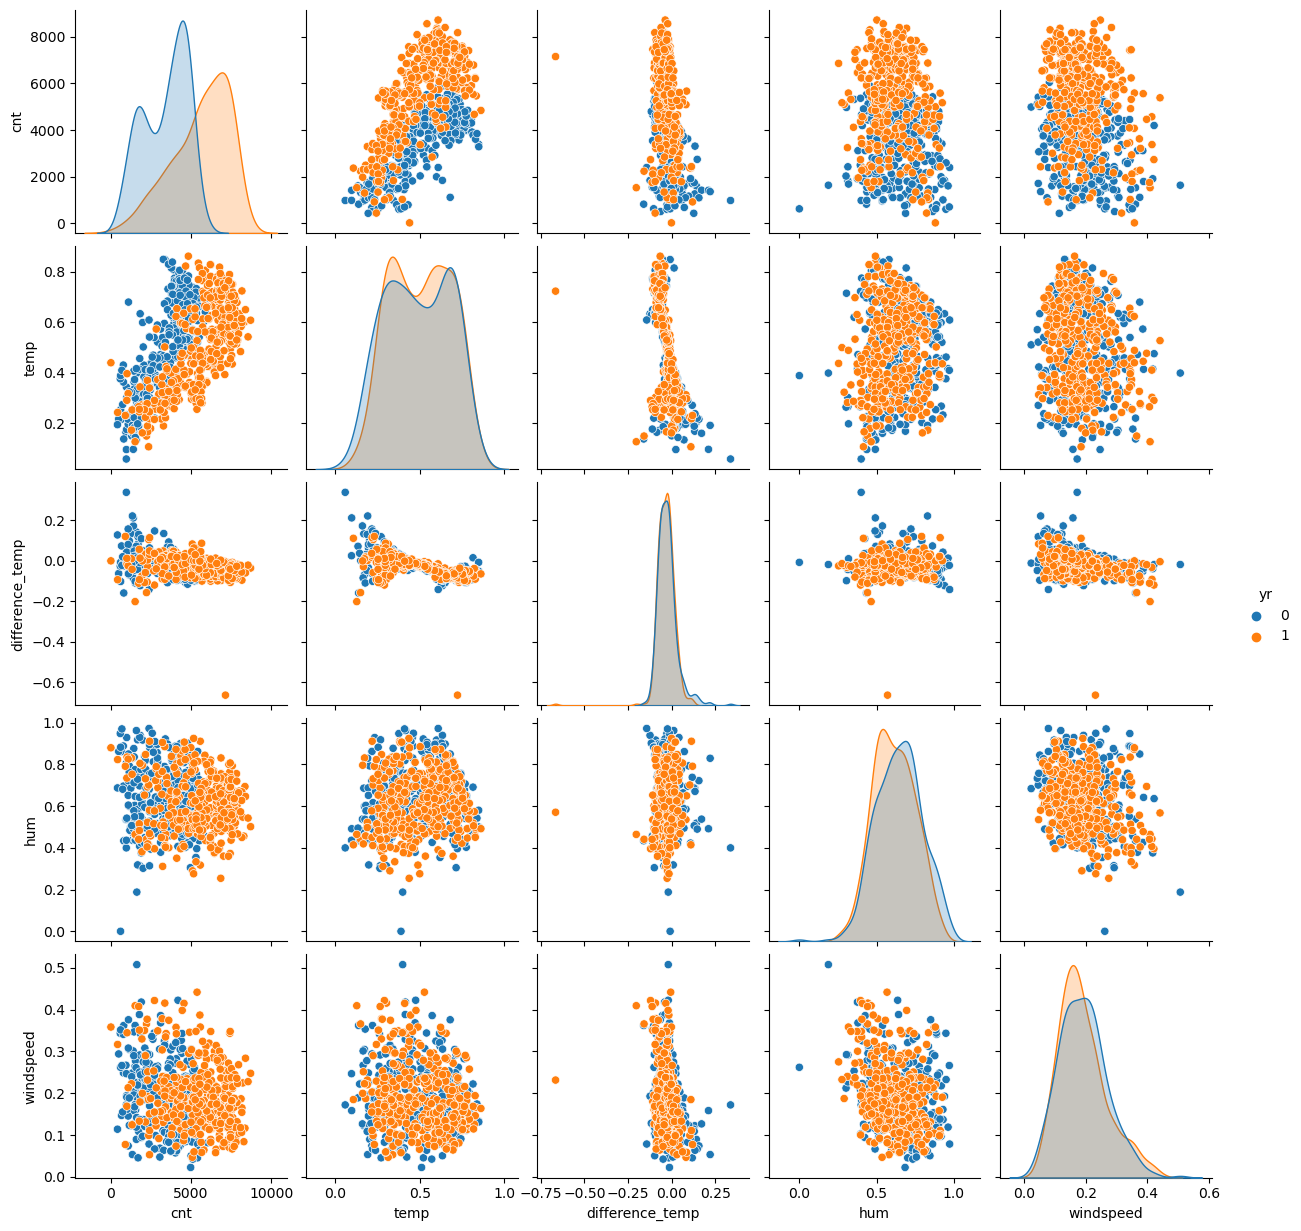

In [104]:
# Multivariate Analysis
fig = sns.pairplot(bike_daily[[target]+numeric_features+['yr']], kind='scatter', hue='yr')
plt.show()

The distribution of weather conditions between the two studied years overlaps, suggesting that the increase in bike rentals is likely caused by different factors, most likely outside the scope of the available data.

#### Numerical variables vs season

The relationship between weather conditions, bike rentals and season is depicted in the scatterplot visualization below. The clearest trend can be observed with the 'temp' and 'difference' variables.

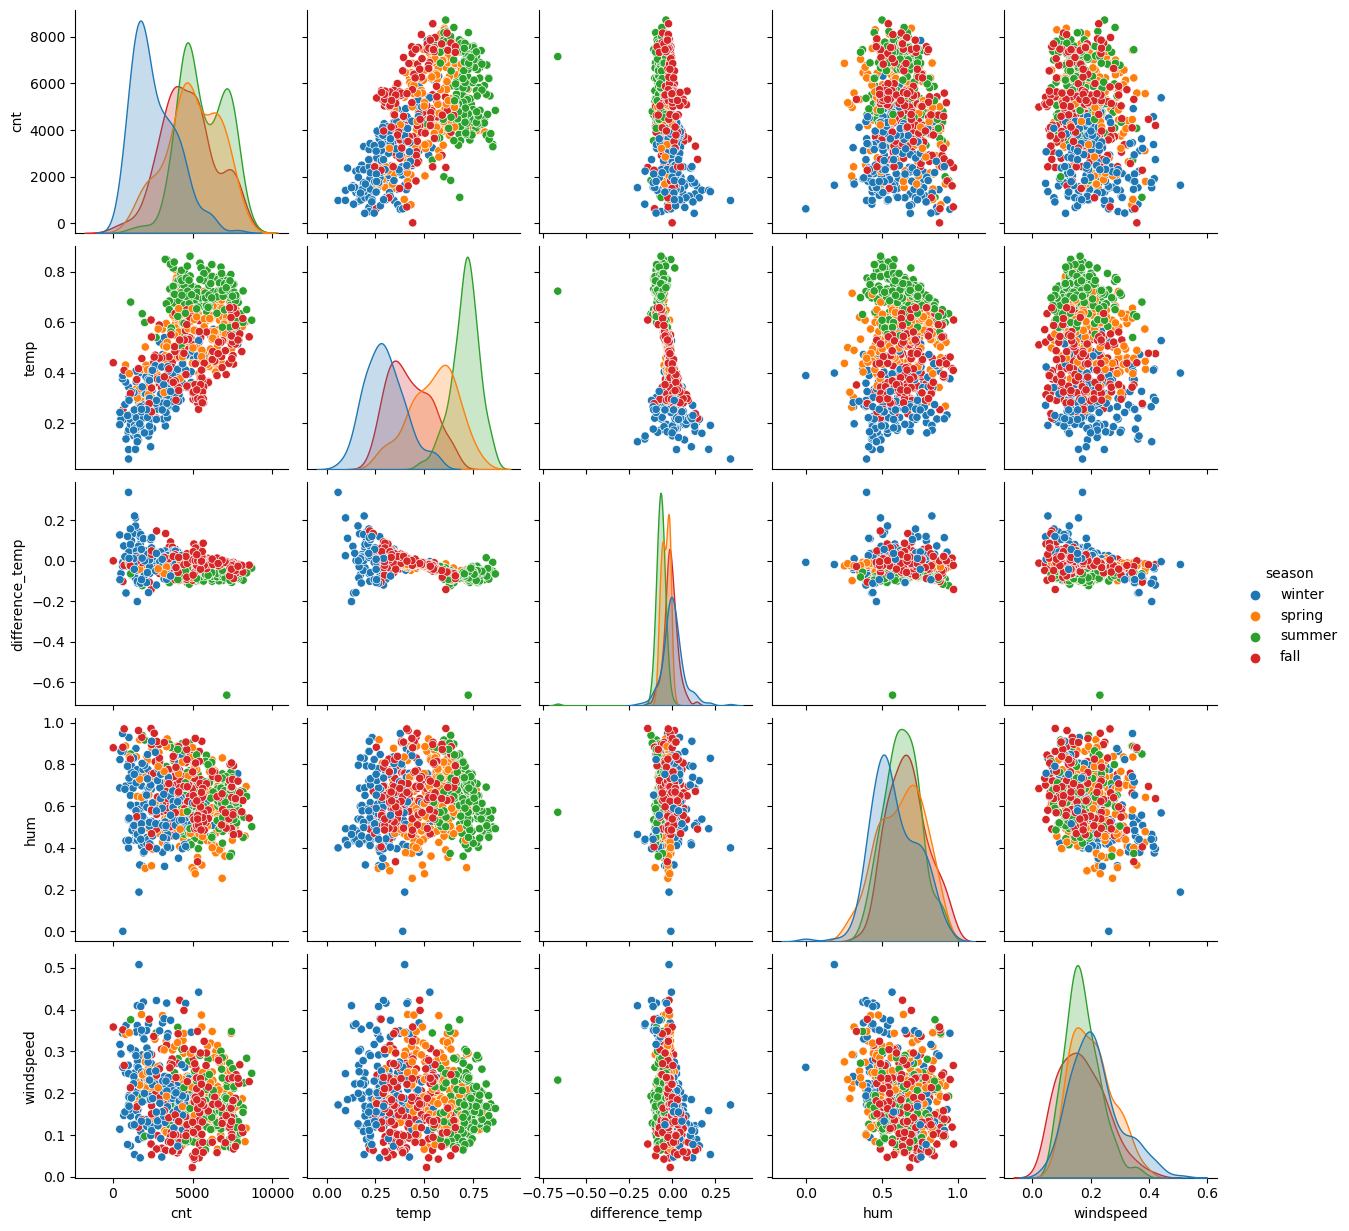

In [105]:
fig = sns.pairplot(bike_daily[[target]+numeric_features+['season']], kind='scatter', hue='season')
plt.show()

Create dummies data for the categorical variables.

In [106]:
# creating dummies data
season= pd.get_dummies(bike_daily['season'], drop_first= True)
mnth= pd.get_dummies(bike_daily['mnth'], drop_first= True)      
weekday= pd.get_dummies(bike_daily['weekday'], drop_first= True)    
weathersit= pd.get_dummies(bike_daily['weathersit'], drop_first= True)  

bike_daily = pd.concat([bike_daily, season, mnth, weekday, weathersit], axis= 1)

# droping columns
bike_daily.drop(['season', 'mnth', 'weekday', 'weathersit', 'casual', 'registered'], axis= 1, inplace= True)
bike_daily.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,difference_temp,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2,3
0,0,0,0,0.344167,0.805833,0.160446,985,0.056537,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0.363478,0.696087,0.248539,801,-0.026794,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0.196364,0.437273,0.248309,1349,-0.035439,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.590435,0.160296,1562,0.060610,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.436957,0.186900,1600,0.010191,0,0,...,0,0,0,0,0,0,0,1,0,0


### Assigment of independent features and the target

In [107]:
# rearrange data frame
cols = bike_daily.columns.tolist()
cols = cols[:6] + cols[7:] + cols[6:7]
bike_daily = bike_daily[cols]

# Features assigned to X matrix and target to the y vector
X = bike_daily.iloc[:,:-1]
y = bike_daily[target].values.reshape(-1,1)
X

print('X:', X.shape)
print('\ny:', y.shape)


X: (731, 29)

y: (731, 1)
